In [21]:
def wikidata_get():
    import requests
    
    url = 'https://query.wikidata.org/sparql'
    query = """
    SELECT DISTINCT ?river ?riverLabel ?destLabel ?river_length WHERE {
  ?river wdt:P17 wd:Q865;
    wdt:P31 wd:Q4022.
    OPTIONAL {?river wdt:P403 ?dest.}
    OPTIONAL {?river wdt:P2043 ?river_length.}
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "zh". }
}
ORDER BY DESC(?length)
    """
    r = requests.get(url, params = {'format': 'json', 'query': query})
    data = r.json()
    print(data)

    import pandas as pd
    from collections import OrderedDict
    
    rivers = []
    for item in data['results']['bindings']:
        #print(item)
        rivers.append(OrderedDict({
            'river': item['river']['value'],
            'riverLabel': item['riverLabel']['value'],
            'destLabel': item['destLabel']['value']
                if 'destLabel' in item else None,
            'river_length': item['river_length']['value']
                if 'river_length' in item else None
                }))
    
    df = pd.DataFrame(rivers)
    df.set_index('riverLabel', inplace=True)
    df = df.astype({'river_length': float})
    df.sort_values(by=['river_length'], inplace=True,ascending=False)
    print(df)

    %matplotlib notebook
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')  
    plt.figure(figsize=(16, 12))

    label = 'river_length'
    df_plot = df[label].sort_values().dropna()    
    df_plot.plot(kind='barh', color='C0', ax=plt.gca());
    plt.ylabel('')
    plt.xticks(rotation=30)
    plt.title(label.capitalize())
    plt.yticks(fontname = 'SimSun',size=8)
    plt.show()
    

{'head': {'vars': ['river', 'riverLabel', 'destLabel', 'river_length']}, 'results': {'bindings': [{'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7416346'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '三疊溪'}, 'destLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '北港溪'}}, {'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7419001'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '三峽河'}, 'destLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '大漢溪'}, 'river_length': {'datatype': 'http://www.w3.org/2001/XMLSchema#decimal', 'type': 'literal', 'value': '28.5'}}, {'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7502643'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '壽豐溪'}, 'destLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '花蓮溪'}}, {'river': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7504436'}, 'riverLabel': {'xml:lang': 'zh', 'type': 'literal', 'value': '

<IPython.core.display.Javascript object>


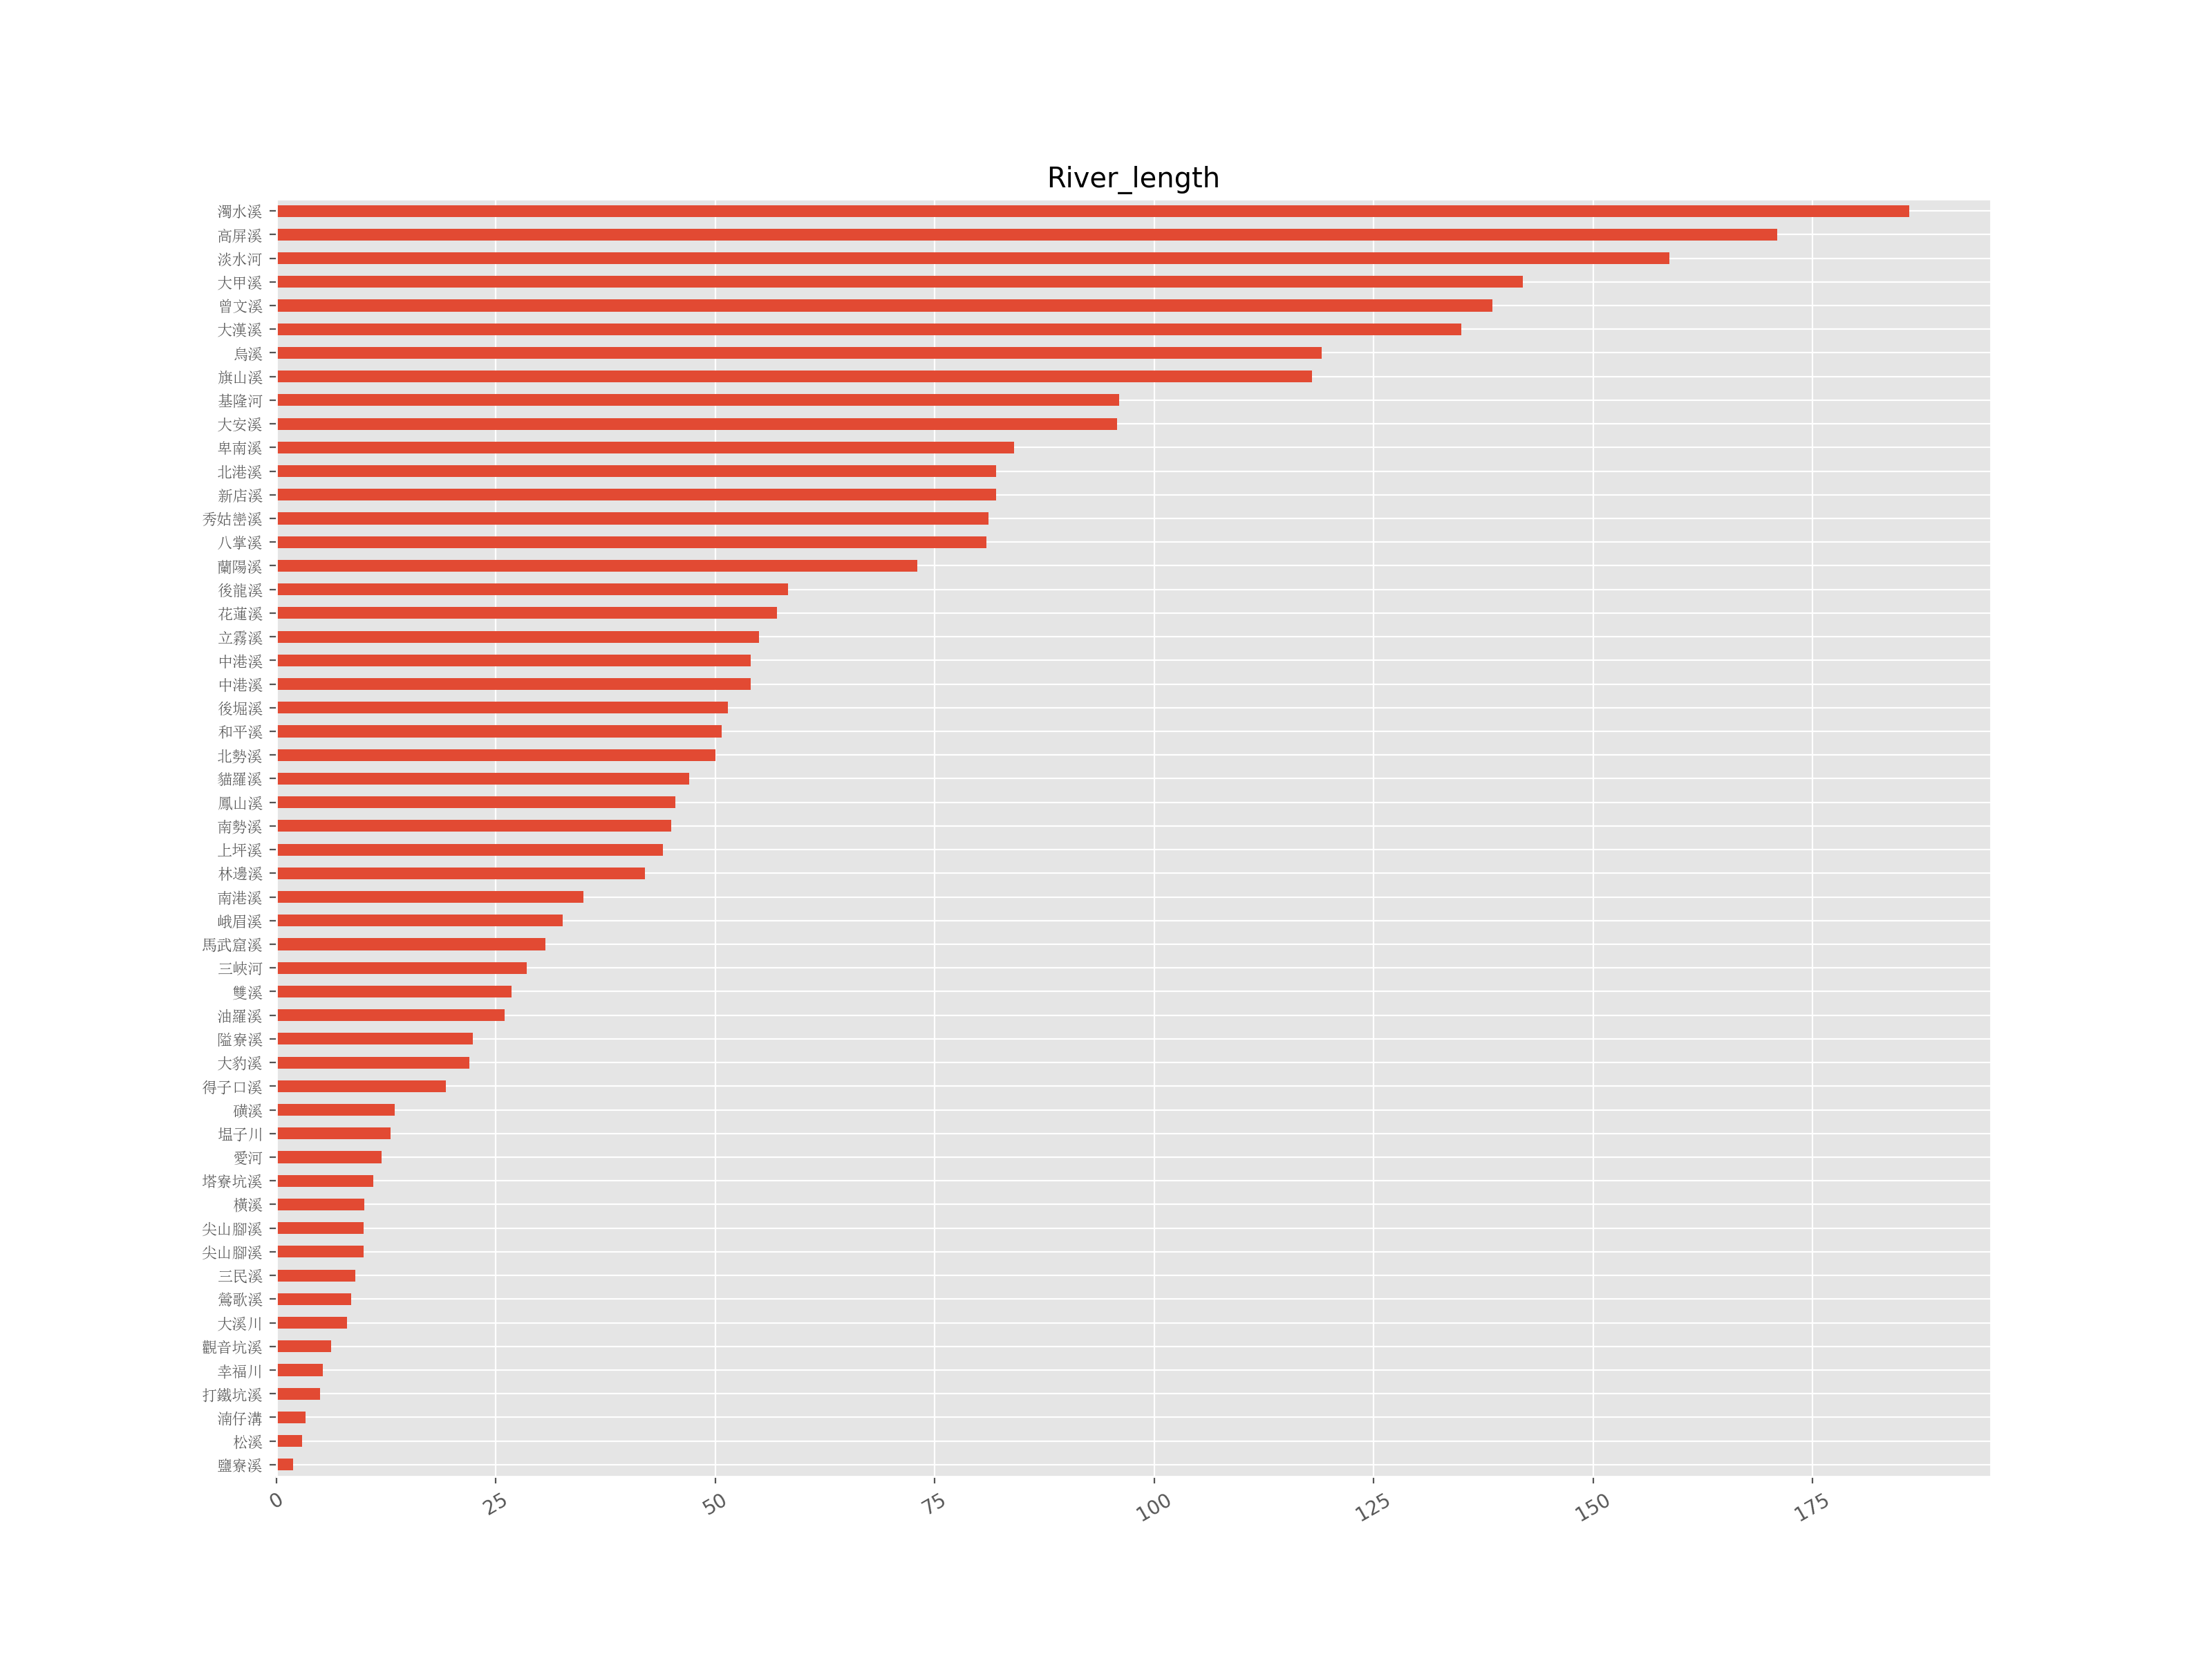

In [22]:
wikidata_get()